## Mergin tables

In [ ]:
import pandas as pd

In [ ]:
db_mulher = pd.read_csv("clustering/mulher_values.csv", sep = ';',low_memory=False)


In [ ]:
db_gravidezes = pd.read_csv("clustering/gravidezes_values.csv", sep = ';',low_memory=False)

In [ ]:
db_mulher.tail()

In [ ]:
db_gravidezes.tail()

In [ ]:
db_joined = pd.merge(db_mulher, db_gravidezes, on='CM000_NQUE')
db_joined

In [ ]:
db_joined.to_csv("clustering/mulher_gravidezes.csv", sep=';')


# Ploting data

http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

In [3]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

In [4]:
db_joined = pd.read_csv("clustering/mulher_values.csv", sep = ';',low_memory=False)
db_joined.shape

(15575, 675)

In [6]:
np.unique(db_joined['M282_ABOR'])#The data has 4 labels

array([' ', '0', '1', '2', '3', '4', '6', '95'], dtype=object)

In [7]:
db_joined.head()

,REC$TYPE,DOMICILIO_ID,MULHER_ID,Merge_mulher,CM000_NQUE,CM000A_QUES,CM002_CONG,CM003_ESTR,CM004_MACR,CM008_SITU,...,M840B_ALTU,XM010_SITU,XM020_NUME,XM110_PESO,XM120_ALTU,XM130_CIRC,XM210_RETI,XM220_HEMO,XM999_PESO,FatorMulheres
0,210,1100010,110001002,,10001002,100010,1,1,1,1,...,155,3,2,"57,3",155,"78,8","9,99","99,99","1259,140021","0,37453324022131235"
1,210,1100020,110002002,,10002002,100020,1,1,1,1,...,"158,6",1,2,"67,6","158,6","87,3","9,99","99,99","2686,00803","0,7989574423481565"
2,210,1100030,110003002,,10003002,100030,1,1,1,1,...,"153,5",3,2,"69,1","153,5","87,3","9,99","99,99","2038,006052","0,6062082036277398"
3,210,1100040,110004002,,10004002,100040,1,1,1,1,...,"146,2",3,2,"53,4","146,2",68,"9,99","99,99","1795,489016","0,534071118166973"
4,210,1100050,110005002,,10005002,100050,1,1,1,1,...,"154,5",2,2,83,"154,6","97,8","9,99","99,99","1773,790328","0,5276168082493699"


In [8]:
print(db_joined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15575 entries, 0 to 15574
Columns: 675 entries, REC$TYPE to FatorMulheres
dtypes: int64(254), object(421)
memory usage: 80.2+ MB
None


## Count values

Text(0, 0.5, 'Valores de M258_TIPO')

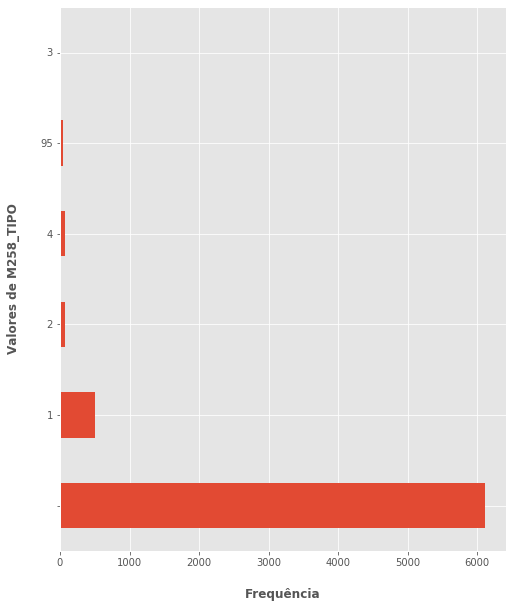

In [53]:
ax = db_joined['M258_TIPO'].value_counts(normalize = False).plot(kind='barh',  figsize=(8, 10))
  # Set x-axis label
ax.set_xlabel("Frequência", labelpad=20, weight='bold', size=12)
  # Set y-axis label
ax.set_ylabel("Valores de M258_TIPO", labelpad=20, weight='bold', size=12)

Text(0,0.5,'Valores de M282_ABOR')

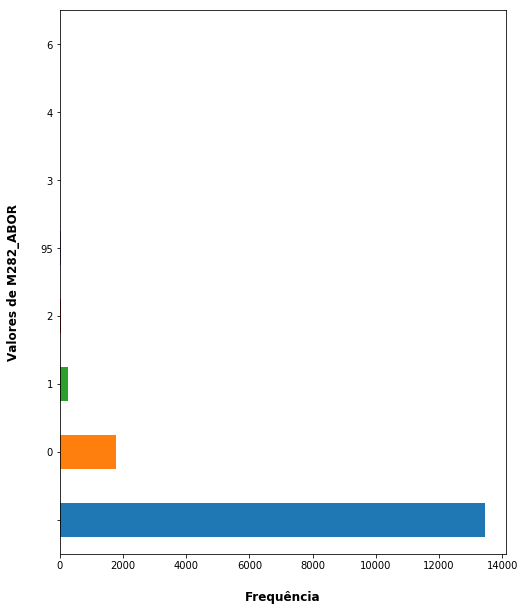

In [9]:
ax = db_joined['M282_ABOR'].value_counts(normalize = False).plot(kind='barh',  figsize=(8, 10))
  # Set x-axis label
ax.set_xlabel("Frequência", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Valores de M282_ABOR", labelpad=20, weight='bold', size=12)

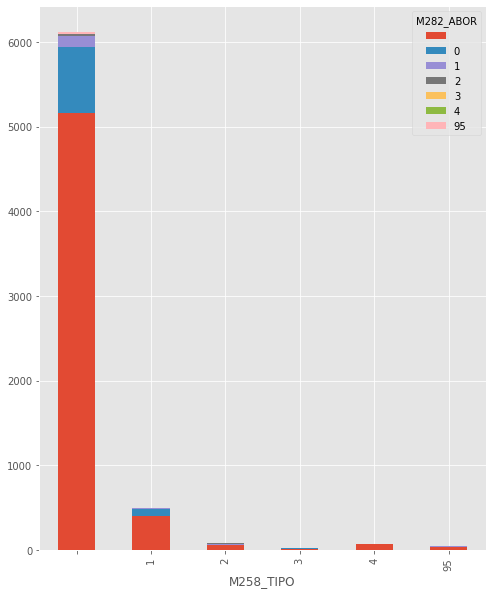

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

db_joined.groupby(['M258_TIPO','M282_ABOR']).size().unstack().plot(kind='bar',stacked=True,  figsize=(8, 10))
plt.show()

## Implement k-prototype 
#### clustering for mixed data type

In [10]:
from kmodes.kprototypes import KPrototypes

In [16]:
db_joined.fillna(0, inplace=True)


In [17]:
categ = db_joined.select_dtypes(include=['object'])
categ_copia = db_joined.select_dtypes(include=['object']).copy()

print(categ.shape)
categoricos = []
for lista in categ:
    #print(lista)
    categoricos.append(db_joined.columns.get_loc(lista))
    #db_joined[lista].astype('category')


print(categ_copia.isnull().values.sum())
#print(categ_copia.isnull().sum())


(15575, 421)
0


In [18]:
num_cols = db_joined.select_dtypes(include=[np.number,np.float64,np.int64])
copia = db_joined.select_dtypes(include=[np.number,np.float64,np.int64]).copy()

print(num_cols.shape)
for l in num_cols:
    #print(l)
    #pd.to_numeric(db_joined[l], errors='coerce').isna()
    db_joined[l].astype(float)
    
print(copia.isnull().values.sum())


(15575, 254)
0


In [19]:
#Data points with their publisher name,category score, category name, place name

kproto = KPrototypes(n_clusters=6, init='Huang', n_init=1, verbose=2)
clusters = kproto.fit_predict(db_joined, categorical=categoricos)
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)


TypeError: '<' not supported between instances of 'str' and 'int'

In [14]:
syms = db_joined['M282_ABOR']
for s, c in zip(syms, clusters):
    print("Result: {}, cluster:{}".format(s, c))
# Plot the results
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(db_joined[index, 0], db_joined[index, 1], 'o')
    plt.suptitle('Data points categorized with category score', fontsize=18)
    plt.xlabel('Category Score', fontsize=16)
    plt.ylabel('Category Type', fontsize=16)
plt.show()
# Clustered result
fig1, ax3 = plt.subplots()
scatter = ax3.scatter(syms, clusters, c=clusters, s=50)
ax3.set_xlabel('Data points')
ax3.set_ylabel('Cluster')
plt.colorbar(scatter)
ax3.set_title('Data points classifed according to known centers')
plt.show()
result = zip(syms, kproto.labels_)
sortedR = sorted(result, key=lambda x: x[1])
print(sortedR)

NameError: name 'clusters' is not defined

# Implementing k-modes 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3, ncost: 3.885029430652437
Run: 1, iteration: 2/100, moves: 4, ncost: 3.7820584896503475
Run: 1, iteration: 3/100, moves: 1, ncost: 3.7750618968237646
Run: 1, iteration: 4/100, moves: 0, ncost: 3.7750618968237646
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3, ncost: 4.203916741843519
Run: 2, iteration: 2/100, moves: 3, ncost: 4.137072933610997
Run: 2, iteration: 3/100, moves: 1, ncost: 4.130076340784414
Run: 2, iteration: 4/100, moves: 0, ncost: 4.130076340784414
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 3, ncost: 3.910044596263404
Run: 3, iteration: 2/100, moves: 0, ncost: 3.910044596263404
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 6, ncost: 4.084074691210567
Run: 4

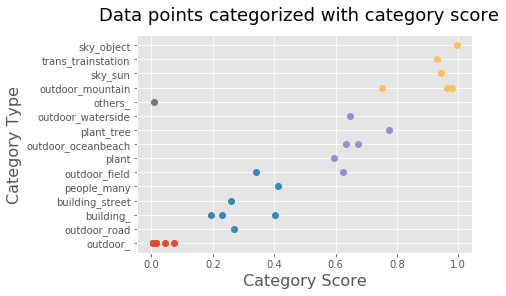

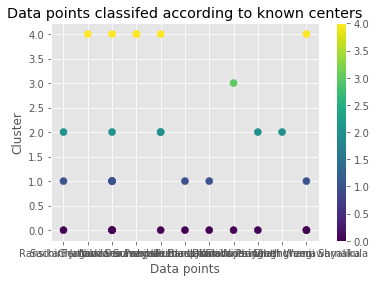

[('Ransika Fernando', 0), ('Chathuri Senanayake', 0), ('Chathuri Senanayake', 0), ('Chathuri Senanayake', 0), ('Hasitha Lakmal', 0), ('Pradeep Kalansooriya', 0), ('Dilini Wijesinghe', 0), ('Chiranthi Vinghghani', 0), ('Chathurangi Shyalika', 0), ('Surangani Bandara', 0), ('Chathurangi Shyalika', 0), ('Ransika Fernando', 1), ('Chathuri Senanayake', 1), ('Chathuri Senanayake', 1), ('Chathuri Senanayake', 1), ('Hasitha Lakmal', 1), ('Pradeep Kalansooriya', 1), ('Chathurangi Shyalika', 1), ('Ransika Fernando', 2), ('Chathuri Senanayake', 2), ('Surangani Bandara', 2), ('Chiranthi Vinghghani', 2), ('Janindu Praneeth Weerawarnakula', 2), ('Surangani Bandara', 2), ('Dilini Wijesinghe', 3), ('Sachini Jagodaarachchi', 4), ('Chathuri Senanayake', 4), ('Nilantha Premakumara', 4), ('Nilantha Premakumara', 4), ('Chathurangi Shyalika', 4), ('Surangani Bandara', 4)]


In [29]:
#!/usr/bin/env python
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
#Data points with their publisher name,category score, category name, place name
syms = np.genfromtxt('travel.csv', dtype=str, delimiter=',')[:, 1]
X = np.genfromtxt('travel.csv', dtype=object, delimiter=',')[:, 2:]
X[:, 0] = X[:, 0].astype(float)
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=2)
clusters = kproto.fit_predict(X, categorical=[1, 2])
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)
for s, c in zip(syms, clusters):
    print("Result: {}, cluster:{}".format(s, c))
# Plot the results
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(X[index, 0], X[index, 1], 'o')
    plt.suptitle('Data points categorized with category score', fontsize=18)
    plt.xlabel('Category Score', fontsize=16)
    plt.ylabel('Category Type', fontsize=16)
plt.show()
# Clustered result
fig1, ax3 = plt.subplots()
scatter = ax3.scatter(syms, clusters, c=clusters, s=50)
ax3.set_xlabel('Data points')
ax3.set_ylabel('Cluster')
plt.colorbar(scatter)
ax3.set_title('Data points classifed according to known centers')
plt.show()
result = zip(syms, kproto.labels_)
sortedR = sorted(result, key=lambda x: x[1])
print(sortedR)